# Diabetes Random Forest Model y Boost

El proyecto ya se tenñia preparado con el modelo de Arbol de Descisiones, sin embargo, se puede mejorar usar un Random Forest o Bosque Aleatorio.

Esta nueva lógica usa una agrupación de arboles generados con porciones aleatorias de los datos y criterios tambén aleatorios. Esto mejora la efectividad cuando un solo árbol no es suficiente.

## 0. Cargamos librerías y modelos

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer


In [18]:
x_train = pd.read_csv("../data/processed/X_train_with_outliers.csv")
x_test = pd.read_csv("../data/processed/X_test_with_outliers.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,115.0,66.0,39.0,140.0,38.1,0.150,28
1,3,113.0,50.0,10.0,85.0,29.5,0.626,25
2,5,158.0,84.0,41.0,210.0,39.4,0.395,29
3,3,78.0,70.0,NaN,NaN,32.5,0.270,39
4,0,101.0,76.0,NaN,NaN,35.7,0.198,26


## 1. Aplicación del Random Forest

In [19]:
model = RandomForestClassifier(n_estimators=100,random_state = 42)
model.fit(x_train, y_train)

c:\Users\bryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


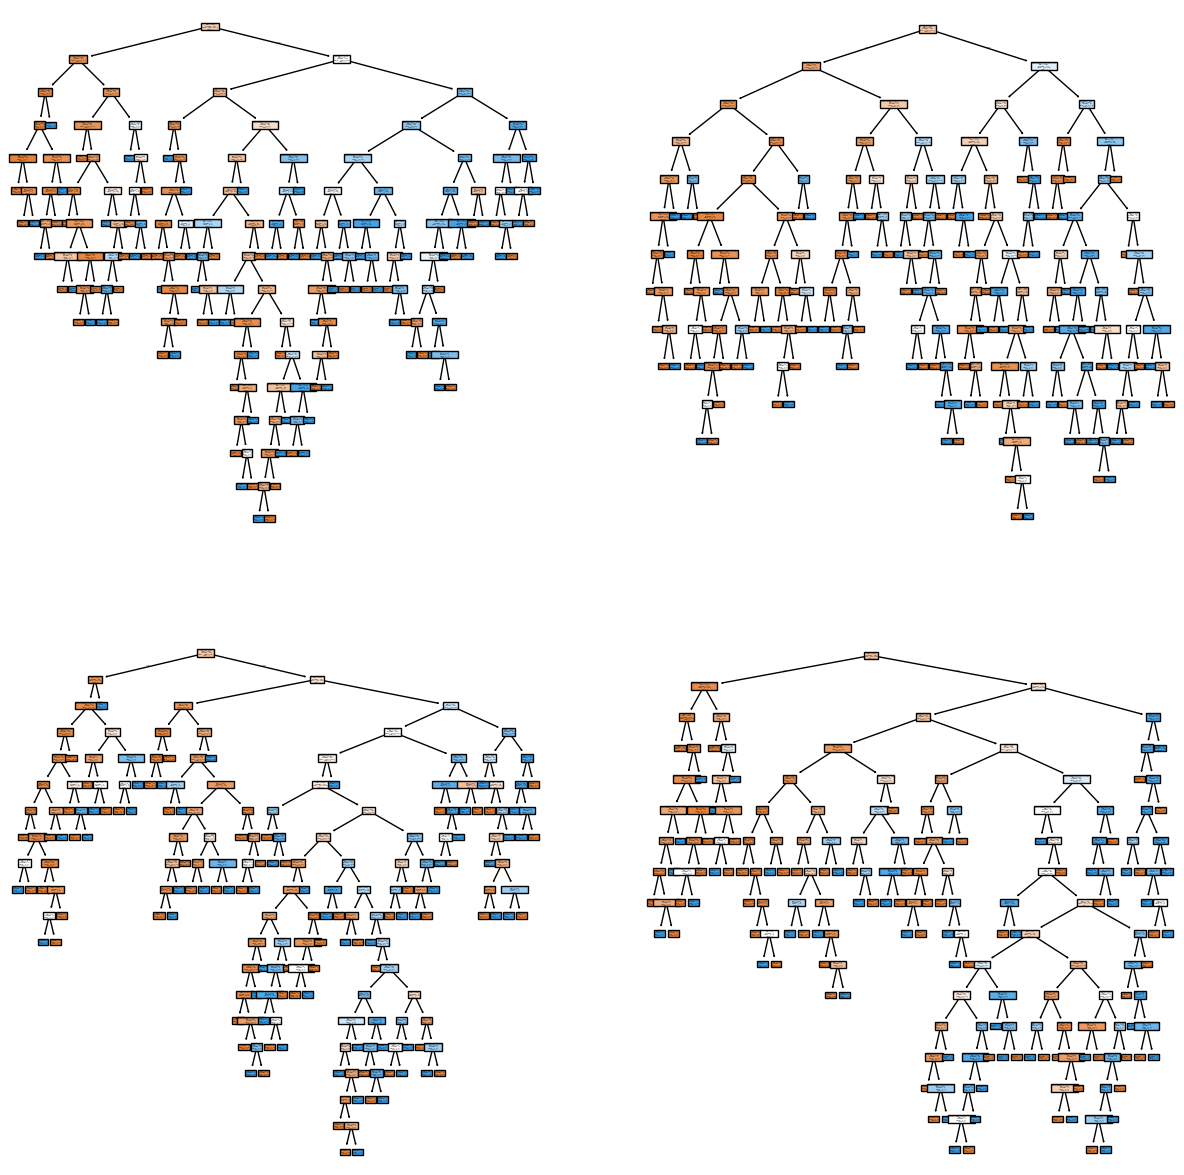

In [20]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Visualizamos 4 arboles de los 100 generados
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(x_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(x_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(x_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(x_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [21]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [22]:
accuracy_score(y_test, y_pred)

0.7792207792207793

## 2. Guardamos el modelo

In [ ]:
dump(model, open("../data/random_forest_classifier_default_42.sav", "wb"))

## 3. Mejorar con Boosting Model

Para poder aplciar los Boost no debe haber valores nulos, a pesar de aplicarse el EDA es posible que hayan valores nulos por haber pasado como camuflados o por algun proceso durante parte posterior a la revisión y antesdurante la creación del train y test

In [36]:
# Crear el imputador
imputer = SimpleImputer(strategy="median")

# Ajustar SOLO con X_train
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(x_train),
    columns=x_train.columns,
    index=x_train.index
)

# Aplicar a X_test (sin fit)
X_test_imputed = pd.DataFrame(
    imputer.transform(x_test),
    columns=x_test.columns,
    index=x_test.index
)

# Comprobación final (debe dar todo 0)
print(X_train_imputed.isna().sum())
print(X_test_imputed.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [32]:
hiperparametros = {
    'n_estimators': 100,    
    'learning_rate': 0.01,  
    'random_state': 42
}

### 3.1. AdaBoost

In [40]:
ada_model = AdaBoostClassifier(
    **hiperparametros
)

ada_model.fit(X_train_imputed, y_train)

ada_pred = ada_model.predict(X_test_imputed)

ada_acc = accuracy_score(y_test, ada_pred)

print("AdaBoost Accuracy:", ada_acc)
print(ada_pred)

AdaBoost Accuracy: 0.7532467532467533
[1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0]


c:\Users\bryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3.2. Gradient Boost

In [41]:
gb_model = GradientBoostingClassifier(
    **hiperparametros
)

gb_model.fit(X_train_imputed, y_train)

gb_pred = gb_model.predict(X_test_imputed)

gb_acc = accuracy_score(y_test, gb_pred)

print("Gradient Boosting Accuracy:", gb_acc)
print(gb_pred)

Gradient Boosting Accuracy: 0.7727272727272727
[1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0]


c:\Users\bryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3.3. XGBoost

In [43]:
xgb_model = XGBClassifier(**hiperparametros)

xgb_model.fit(X_train_imputed, y_train)

xgb_pred = xgb_model.predict(X_test_imputed)

xgb_acc = accuracy_score(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_acc)
print(xgb_pred)

XGBoost Accuracy: 0.7727272727272727
[1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0]


**Mejor Modelo de Boost**

In [44]:
print("Resultados finales:")
modelos = {
    'AdaBoost': ada_acc,    
    'Gradient Boosting': gb_acc,  
    'XGBoost': xgb_acc
}

for nombre, acc in modelos.items():
    print(f"{nombre} Accuracy: {acc:.4f}")

mejor_modelo = max(modelos, key=modelos.get)

print(f"\nEl mejor modelo es: {mejor_modelo} con Accuracy = {modelos[mejor_modelo]:.4f}")


Resultados finales:
AdaBoost Accuracy: 0.7532
Gradient Boosting Accuracy: 0.7727
XGBoost Accuracy: 0.7727

El mejor modelo es: Gradient Boosting con Accuracy = 0.7727


## Guardamos el modelo con Boost

In [45]:
dump(gb_model, open("../models/gradientboost_model.sav", "wb"))